In [11]:
#載入所需模組
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
from numpy import load
from numpy import save
import random
import os
import gc

In [12]:
#事先將資料上傳到google drive 然後用google colab 連接
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
labels = os.listdir("/content/gdrive/My Drive/Covid_data_merge")
labels

['Normal', 'Viral Pneumonia', 'COVID', 'Lung_Opacity']

In [14]:
import cv2
import numpy as np
number = [0]
tem = 0
for i in range(len(labels)):
  path = "/content/gdrive/My Drive/Covid_data_merge/" + labels[i]
  tem = tem + len(os.listdir(path))
  number += [len(os.listdir(path))]
print(number)
data = np.zeros((tem,150,150),dtype = int)
y = np.zeros((tem,len(labels)),dtype = int)
tem = 0
for i in range(len(labels)):
  print(labels[i])
  path = "/content/gdrive/My Drive/Covid_data_merge/" + labels[i]
  os.chdir(path)
  pic_list = os.listdir(path)
  for j in range(len(pic_list)):
    y[number[i] + j,i] = 1
    data[number[i] + j,:,:] = cv2.imread(pic_list[j], cv2.IMREAD_GRAYSCALE)

[0, 10192, 1345, 3616, 6012]
Normal
Viral Pneumonia
COVID
Lung_Opacity


COVID-3372.png


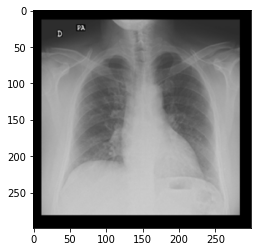

In [ ]:
def show_grey(x):
    y = np.zeros((299,299,3))
    y[:,:,0] = x
    y[:,:,1] = x
    y[:,:,2] = x
    return y.astype(int)
import matplotlib.pyplot as plt
plt.imshow(show_grey(data[0,:,:]))
print(os.listdir("/content/gdrive/My Drive/Covid_data/" + labels[0])[0])